# Data Exploration

There is already a great Notebook for data exporation. We condenced the information and made our own plots.
The original Notebook can be found [here](https://www.kaggle.com/code/andradaolteanu/birdcall-recognition-eda-and-audio-fe)


In [103]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import plotly.express as px
import geopandas as gpd
from shapely.geometry import Point, Polygon

In [60]:
train_csv = pd.read_csv("./input/birdsong-recognition/train.csv")
test_csv = pd.read_csv("./input/birdsong-recognition/test.csv")

# Create some time features
train_csv['year'] = train_csv['date'].apply(lambda x: x.split('-')[0])
train_csv['month'] = train_csv['date'].apply(lambda x: x.split('-')[1])
train_csv['day_of_month'] = train_csv['date'].apply(lambda x: x.split('-')[2])

train_csv["elevation meters"] = train_csv["elevation"].apply(lambda x: x.split(" ")[0])

train_csv.head()

,rating,playback_used,ebird_code,channels,date,pitch,duration,filename,speed,species,...,primary_label,longitude,length,time,recordist,license,year,month,day_of_month,elevation meters
0,3.5,no,aldfly,1 (mono),2013-05-25,Not specified,25,XC134874.mp3,Not specified,Alder Flycatcher,...,Empidonax alnorum_Alder Flycatcher,-92.962,Not specified,8:00,Jonathon Jongsma,Creative Commons Attribution-ShareAlike 3.0,2013,05,25,220
1,4.0,no,aldfly,2 (stereo),2013-05-27,both,36,XC135454.mp3,both,Alder Flycatcher,...,Empidonax alnorum_Alder Flycatcher,-82.1106,0-3(s),08:30,Mike Nelson,Creative Commons Attribution-NonCommercial-Sha...,2013,05,27,1700
2,4.0,no,aldfly,2 (stereo),2013-05-27,both,39,XC135455.mp3,both,Alder Flycatcher,...,Empidonax alnorum_Alder Flycatcher,-82.1106,0-3(s),08:30,Mike Nelson,Creative Commons Attribution-NonCommercial-Sha...,2013,05,27,1700
3,3.5,no,aldfly,2 (stereo),2013-05-27,both,33,XC135456.mp3,both,Alder Flycatcher,...,Empidonax alnorum_Alder Flycatcher,-82.1106,0-3(s),08:30,Mike Nelson,Creative Commons Attribution-NonCommercial-Sha...,2013,05,27,1700
4,4.0,no,aldfly,2 (stereo),2013-05-27,both,36,XC135457.mp3,level,Alder Flycatcher,...,Empidonax alnorum_Alder Flycatcher,-82.1106,0-3(s),08:30,Mike Nelson,Creative Commons Attribution-NonCommercial-Sha...,2013,05,27,1700


In [100]:
one_color = "#A5DAF0"
color_map = ["#000", one_color]

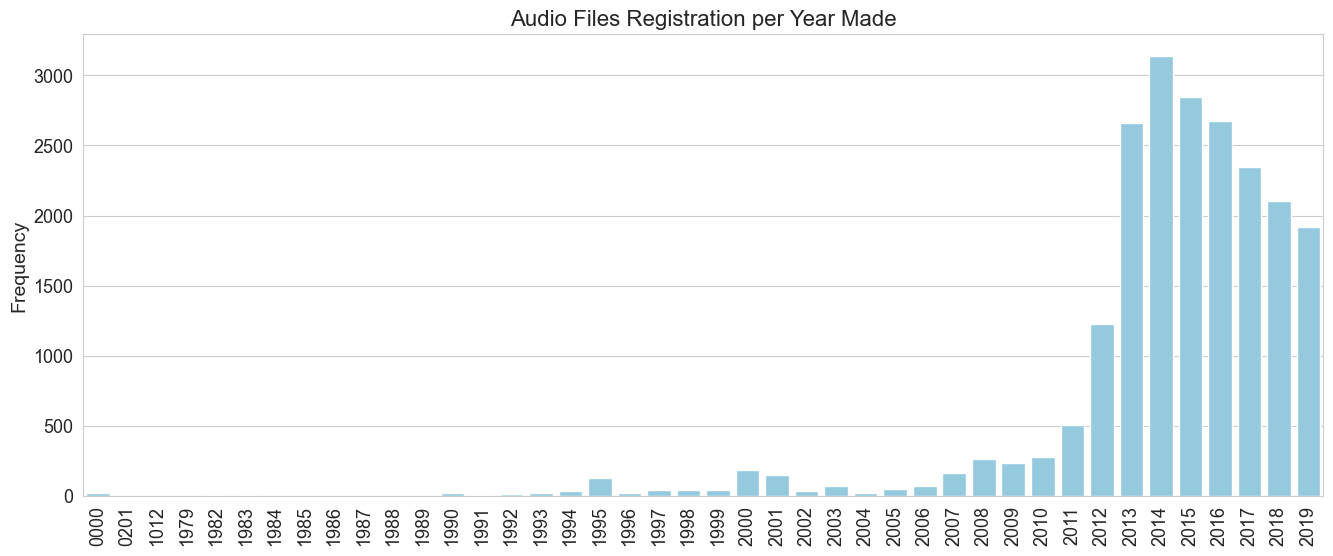

In [18]:
# time bar plot 
year_sorted = train_csv.sort_values('year')

plt.figure(figsize=(16, 6))
# ax = sns.countplot(train_csv['year'], palette="hls") but vertical sorted by year 
ax = sns.countplot(x="year", data=year_sorted, color=one_color)

plt.title("Audio Files Registration per Year Made", fontsize=16)
plt.xticks(rotation=90, fontsize=13)
plt.yticks(fontsize=13)
plt.ylabel("Frequency", fontsize=14)
plt.xlabel("");

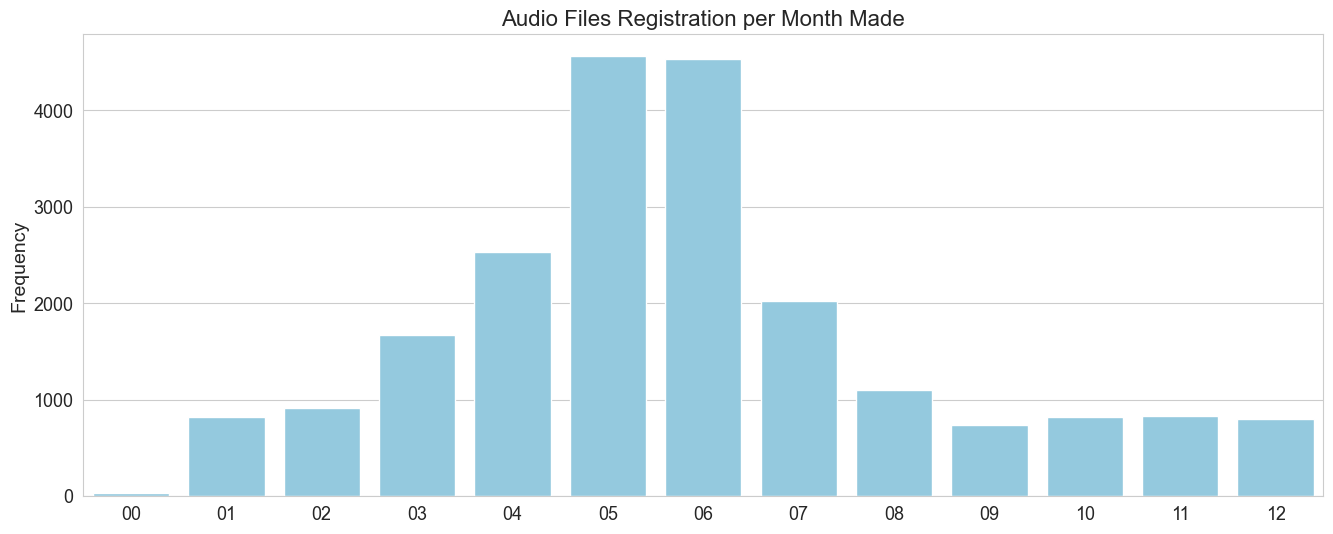

In [26]:
sorted_month = train_csv.sort_values('month')

plt.figure(figsize=(16, 6))
ax = sns.countplot(x="month", data=sorted_month, color=one_color)

plt.title("Audio Files Registration per Month Made", fontsize=16)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.ylabel("Frequency", fontsize=14)
plt.xlabel("");

Text(0.5, 0, '')

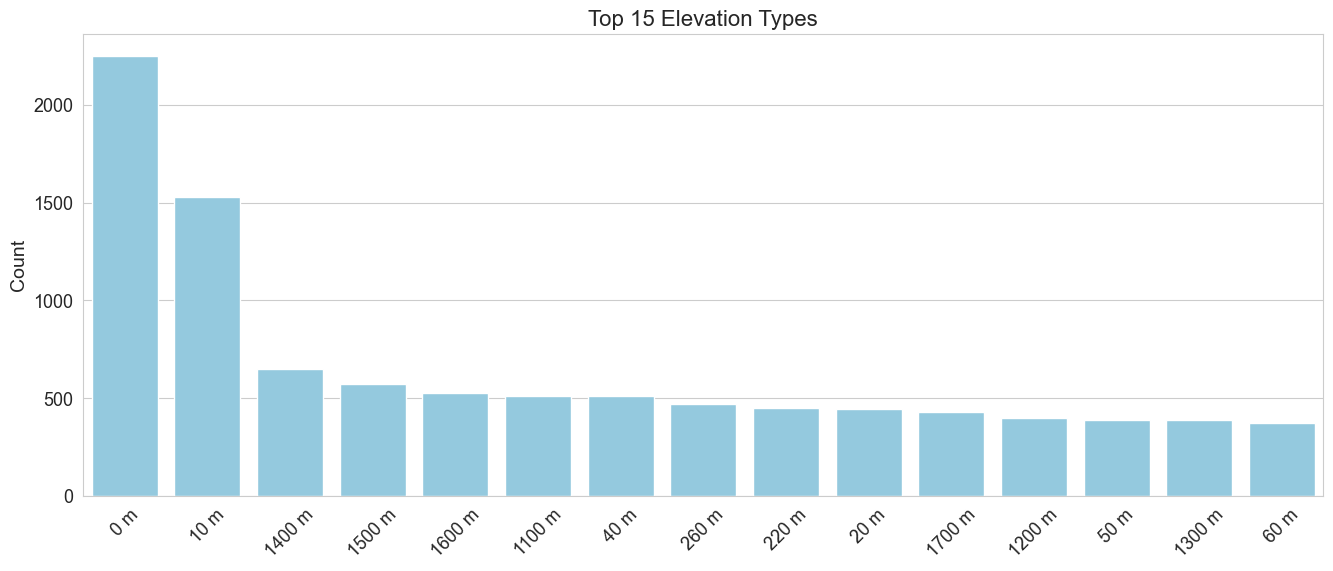

In [59]:
# Top 15 most common elevations

plt.figure(figsize=(16, 6))
ax = sns.countplot(x="elevation", data=train_csv, order=train_csv['elevation'].value_counts()[:15].index,
                   color=one_color)

plt.title("Top 15 Elevation Types", fontsize=16)
plt.ylabel("Count", fontsize=14)
plt.yticks(fontsize=13)
plt.xticks(rotation=45, fontsize=13)
plt.xlabel("")

Text(0.5, 0, '')

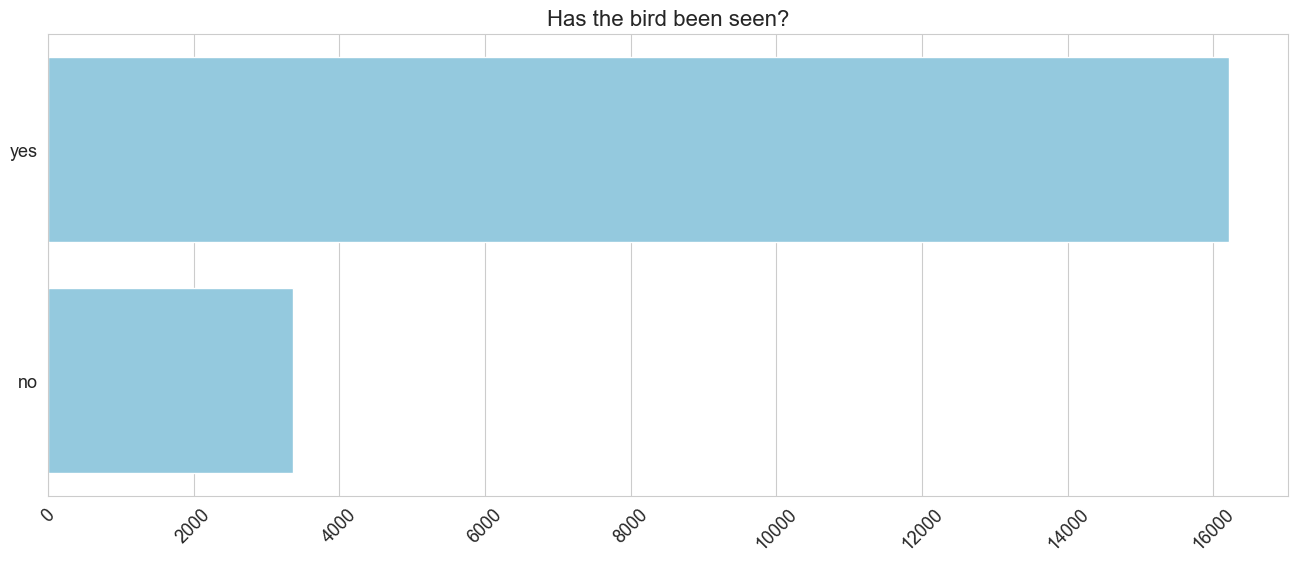

In [77]:
# Create data
data = train_csv['bird_seen'].value_counts().reset_index()

plt.figure(figsize=(16, 6))
sns.barplot(x="count", y="bird_seen", data=data, color=one_color) 

plt.title("Has the bird been seen?", fontsize=16)
plt.ylabel("",)
plt.yticks(fontsize=13)
plt.xticks(rotation=45, fontsize=13)
plt.xlabel("")

(array([  0.,  50., 100., 150., 200., 250., 300.]),
 [Text(0.0, 0, '0'),
  Text(50.0, 0, '50'),
  Text(100.0, 0, '100'),
  Text(150.0, 0, '150'),
  Text(200.0, 0, '200'),
  Text(250.0, 0, '250'),
  Text(300.0, 0, '300')])

<Figure size 1600x600 with 0 Axes>

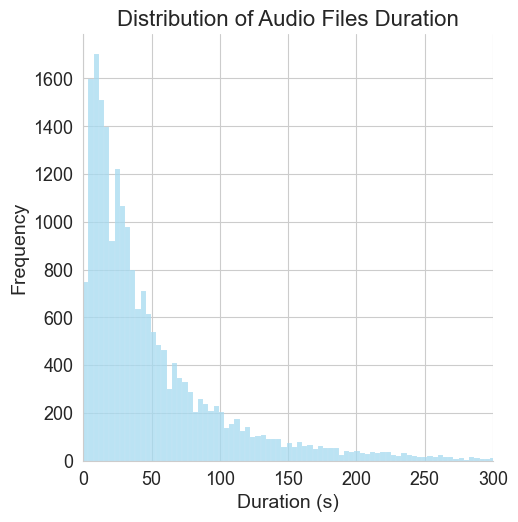

In [104]:
# plot length of audio files
plt.figure(figsize=(16, 6))
ax = sns.displot(train_csv['duration'], color=one_color)

plt.xlim(0, 300)
plt.title("Distribution of Audio Files Duration", fontsize=16)
plt.ylabel("Frequency", fontsize=14)
plt.yticks(fontsize=13)
plt.xlabel("Duration (s)", fontsize=14)
plt.xticks(fontsize=13)

C:\Users\fende\AppData\Local\Temp\ipykernel_10860\269849259.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\fende\AppData\Local\Temp\ipykernel_10860\269849259.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\fende\AppData\Local\Programs\Python\Python312\Lib\site-packages\pyproj\crs\crs.py:141: FutureWarning:

'+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https:/

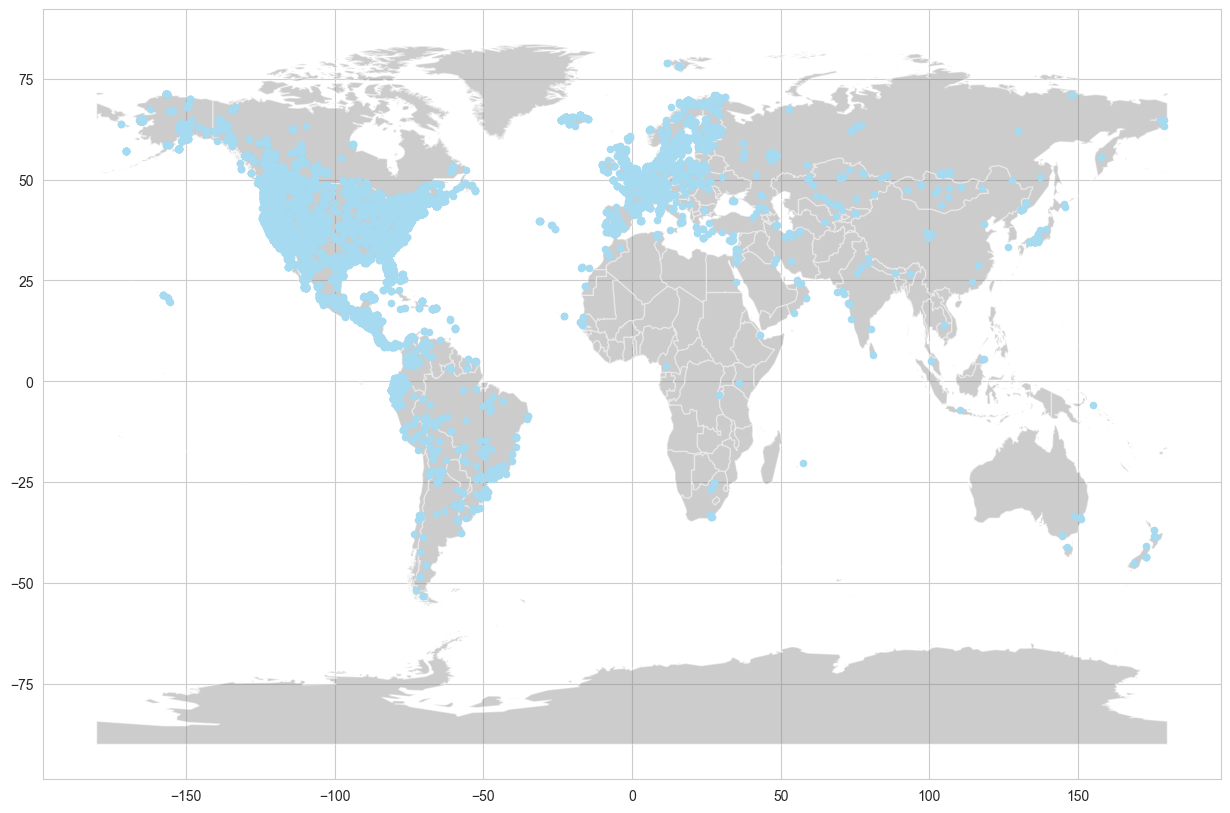

In [109]:
# SHP file
world_map = gpd.read_file("./input/world-shape/world_shapefile.shp")

# Coordinate reference system
crs = {"init" : "epsg:4326"}

# Lat and Long need to be of type float, not object
data = train_csv[train_csv["latitude"] != "Not specified"]
data["latitude"] = data["latitude"].astype(float)
data["longitude"] = data["longitude"].astype(float)

# Create geometry
geometry = [Point(xy) for xy in zip(data["longitude"], data["latitude"])]

# Geo Dataframe
geo_df = gpd.GeoDataFrame(data, crs=crs, geometry=geometry)

# Create ID for species
species_id = geo_df["species"].value_counts().reset_index()
species_id.insert(0, 'ID', range(0, 0 + len(species_id)))

species_id.columns = ["ID", "species", "count"]

# Add ID to geo_df
geo_df = pd.merge(geo_df, species_id, how="left", on="species")

# === PLOT ===
fig, ax = plt.subplots(figsize = (16, 10))
world_map.plot(ax=ax, alpha=0.4, color="grey")

palette = iter(sns.hls_palette(len(species_id)))

for i in range(264):
    geo_df[geo_df["ID"] == i].plot(ax=ax, markersize=20, color=one_color, marker="o", label = "test");